In [2]:
import pickle
x_dev, y_dev = None, None
with open('train.pickle', 'rb') as file:
    x_dev, y_dev = pickle.load(file)

X_test, Y_test = None, None
with open('test.pickle', 'rb') as file:
    X_test, Y_test = pickle.load(file)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from imblearn.combine import SMOTEENN

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc, roc_curve, roc_auc_score

In [4]:
import numpy as np

X_train, X_val, Y_train, Y_val = train_test_split(x_dev,y_dev, test_size=0.2, random_state=0)

label = {'Fully Paid' : 0, 'Charged Off' : 1}


Y_train = Y_train.apply(lambda x: label[x]).values
Y_test = Y_test.apply(lambda x: label[x]).values
Y_val = Y_val.apply(lambda x : label[x]).values

# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test


**Logistic regression**


*   Grid search to find best hyperparameters
*   SMOTE, Undersampling, oversampling to handle the imbalanced dataset



In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


# Define logistic regression model
lr = LogisticRegression()

# Define grid search parameters
params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}

# Perform grid search to find best parameters
grid_search = GridSearchCV(lr, param_grid=params, cv=5)
grid_search.fit(X_train, Y_train)

# Print best parameters and score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Predict on test set using best parameters
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3

Best parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best score: 0.8070144066246543


Accuracy on test set

In [7]:


# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8072458398937976


Confusion matrix

<Axes: >

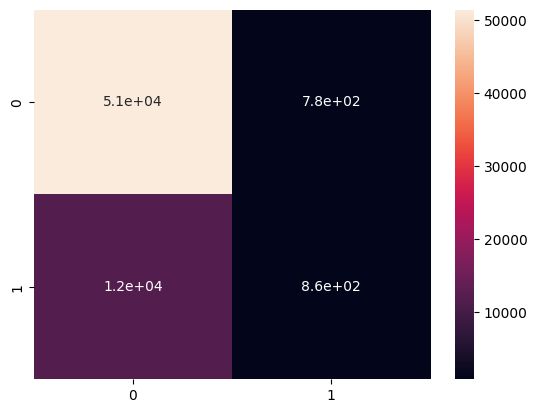

In [9]:

import seaborn as sns


cf_matrix=confusion_matrix(Y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

Handling imbalanced data with SMOTE,undersampling and Oversampling and ROC curve

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

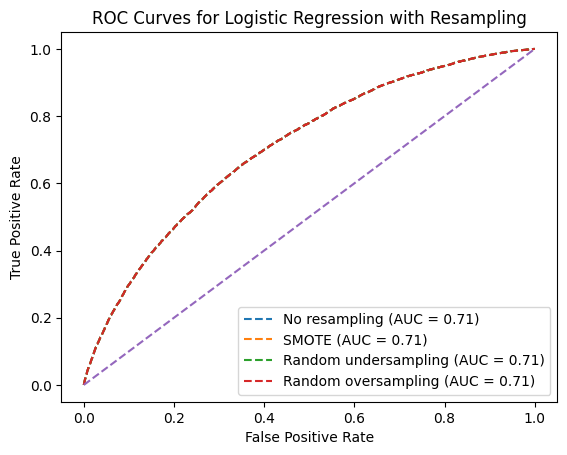

In [11]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler


ros = RandomOverSampler()
X_train_over,  y_train_over = ros.fit_resample(X_train, Y_train)


smote = SMOTE()
under = RandomUnderSampler()
X_train_smote, y_train_smote = smote.fit_resample(X_train, Y_train)
X_train_under, y_train_under = under.fit_resample(X_train, Y_train)

# train logistic regression models on each resampled dataset
model_no_resampling = grid_search.fit(X_train, Y_train)
model_smote = grid_search.fit(X_train_smote, y_train_smote)
model_under = grid_search.fit(X_train_under, y_train_under)
model_over = grid_search.fit(X_train_over, y_train_over)

# predict probabilities on test set
y_prob_no_resampling = model_no_resampling.predict_proba(X_test)[:, 1]
y_prob_smote = model_smote.predict_proba(X_test)[:, 1]
y_prob_under = model_under.predict_proba(X_test)[:, 1]
y_prob_over = model_over.predict_proba(X_test)[:, 1]

# calculate false positive rate and true positive rate for ROC curves
fpr_no_resampling, tpr_no_resampling, _ = roc_curve(Y_test, y_prob_no_resampling)
fpr_smote, tpr_smote, _ = roc_curve(Y_test, y_prob_smote)
fpr_under, tpr_under, _ = roc_curve(Y_test, y_prob_under)
fpr_over, tpr_over, _ = roc_curve(Y_test, y_prob_over)

# calculate ROC AUC scores
auc_no_resampling = roc_auc_score(Y_test, y_prob_no_resampling)
auc_smote = roc_auc_score(Y_test, y_prob_smote)
auc_under = roc_auc_score(Y_test, y_prob_under)
auc_over = roc_auc_score(Y_test, y_prob_over)

# plot ROC curves
plt.plot(fpr_no_resampling, tpr_no_resampling, linestyle='--', label='No resampling (AUC = %0.2f)' % auc_no_resampling)
plt.plot(fpr_smote, tpr_smote, linestyle='--', label='SMOTE (AUC = %0.2f)' % auc_smote)
plt.plot(fpr_under, tpr_under, linestyle='--', label='Random undersampling (AUC = %0.2f)' % auc_under)
plt.plot(fpr_over, tpr_over, linestyle='--', label='Random oversampling (AUC = %0.2f)' % auc_over)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression with Resampling')
plt.legend(loc='lower right')
plt.show()
